In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Exploration**

In [2]:
# reading in the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# describes the data thorugh various statistical measurements
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Understanding the data we are working with
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 100000
Number of columns: 9


In [6]:
# Counts the number of null entries for each column
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
# all columns in the dataframe
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


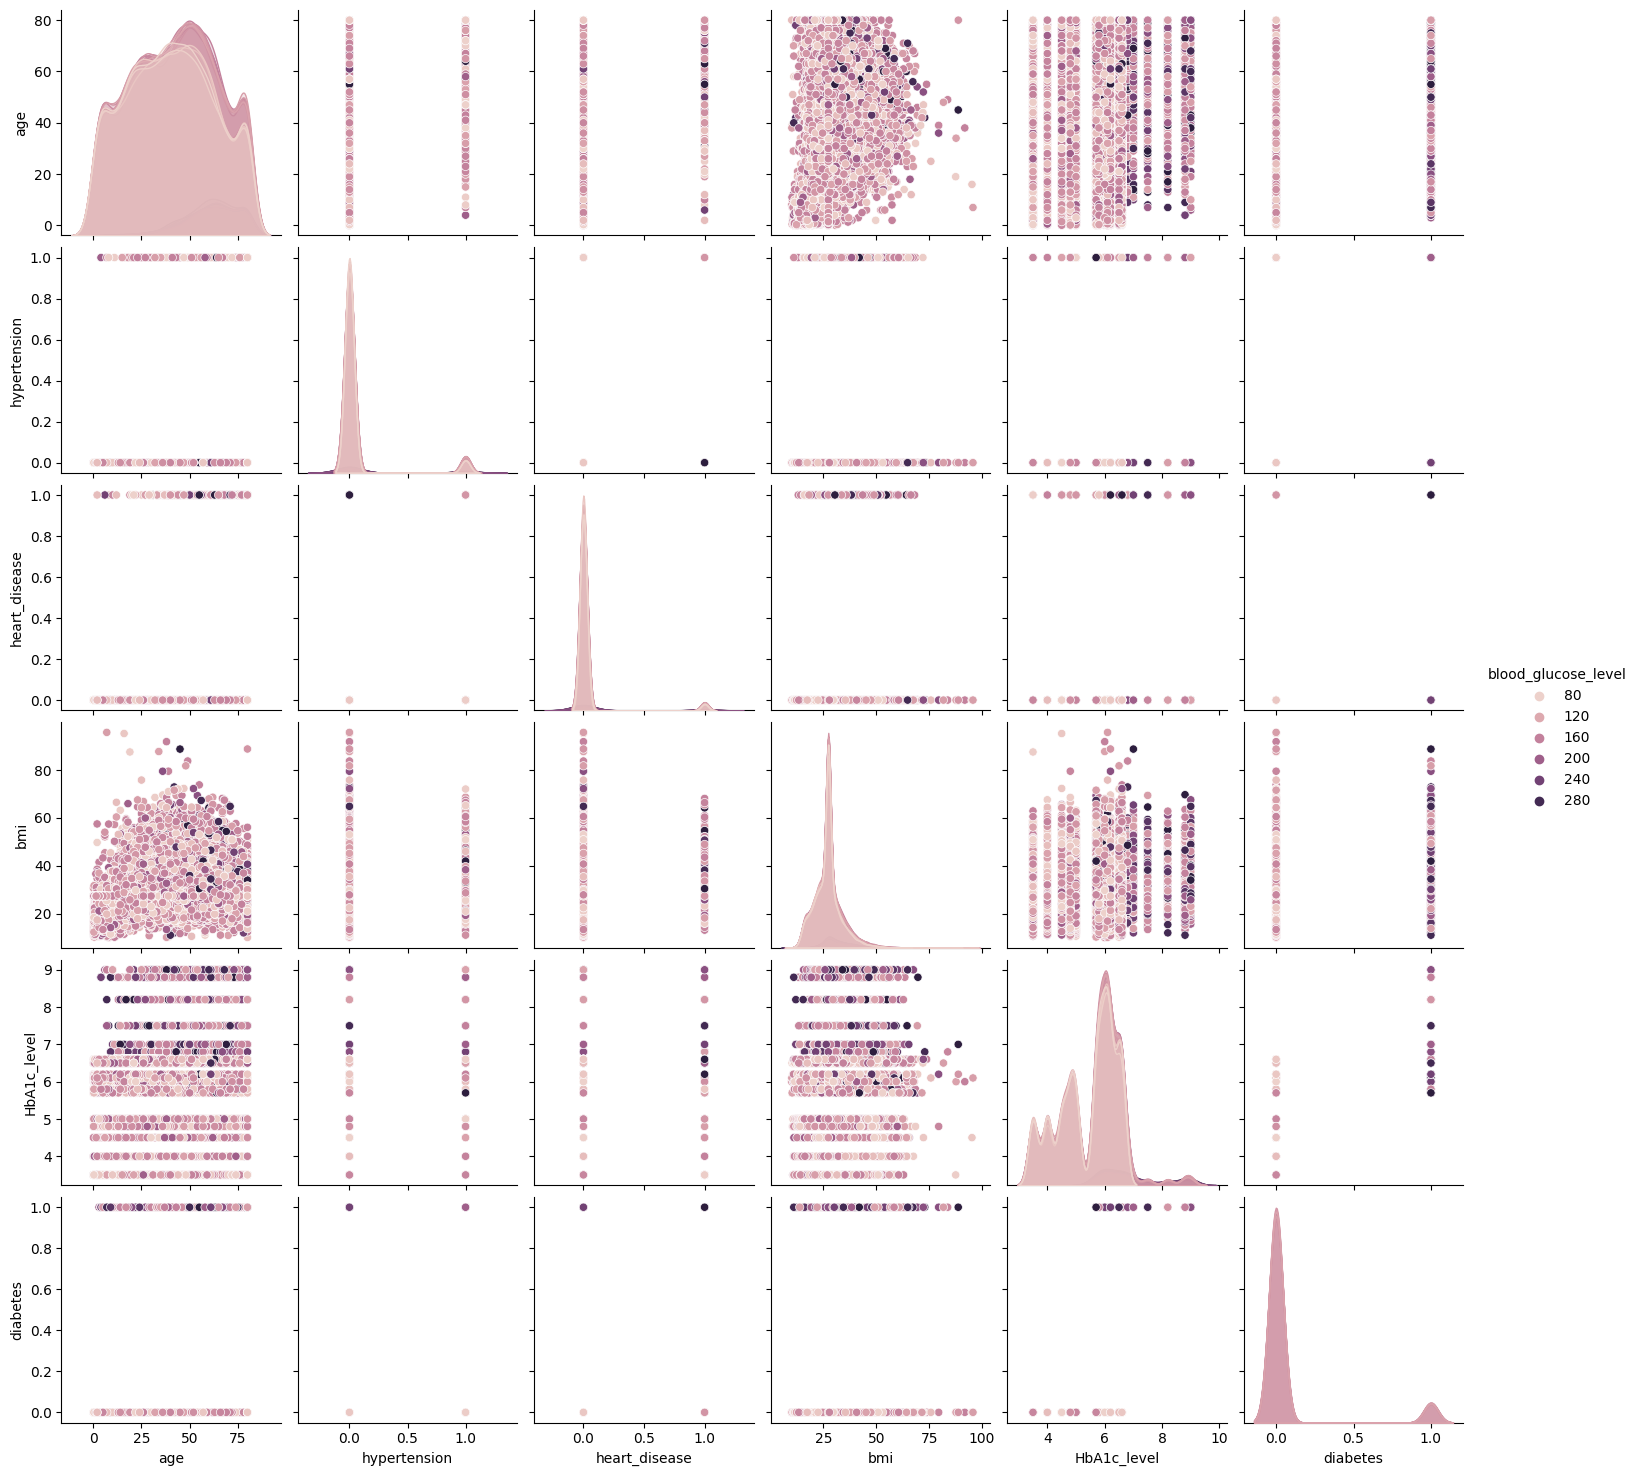

In [8]:
# pairplot of the our data
sns.pairplot(df, hue='blood_glucose_level');

In [9]:
# number of unique values in each column
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

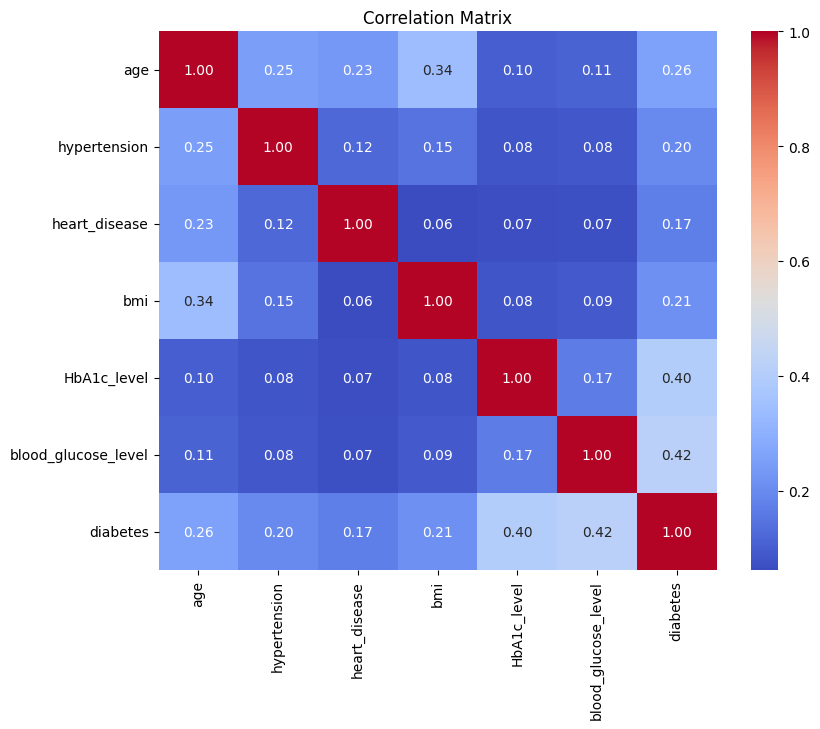

In [10]:
# correlation matrix with all of the features that are numerical
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## **Feature Engineering**

- Features gender and smoking_history are categorical so I will encode them into numerical values.

In [11]:
# creating another dataframe to encode
encoded_df = df.copy()

In [12]:
# gender columns values
uniq_genders = df.get('gender').unique()
uniq_genders

array(['Female', 'Male', 'Other'], dtype=object)

In [13]:
# addresses genders as Male = 2, Female = 1, and Other = 0
encoded_df['gender'] = encoded_df['gender'].map({'Male': 2, 'Female': 1, 'Other': 0})
encoded_df.get('gender').unique()

array([1, 2, 0])

In [14]:
# smoking_history values
uniq_smoking = df.get('smoking_history').unique()
uniq_smoking

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

# addresses smoking_history with Label Encoders as there are a lot of values
label_encoder = LabelEncoder()

# Assuming 'category_column' is the column you want to encode
encoded_df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
encoded_df.get('smoking_history').unique()

array([4, 0, 1, 3, 2, 5])

In [16]:
# dictionaries with the columns before and after encoding
gender_dct = dict(zip(uniq_genders, encoded_df.get('gender').unique()))
smoking_dct = dict(zip(uniq_smoking, encoded_df.get('smoking_history').unique()))

print(gender_dct)
print(smoking_dct)

{'Female': 1, 'Male': 2, 'Other': 0}
{'never': 4, 'No Info': 0, 'current': 1, 'former': 3, 'ever': 2, 'not current': 5}


## **Data Splitting (Train/Test)**

In [17]:
# isolating the target variable
x = encoded_df.drop(columns=['blood_glucose_level'])
y = encoded_df.get('blood_glucose_level')

In [18]:
# creating training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## **Modeling**

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

# using gradient boosting as the relationship between the variables aren't linear
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# create predictions
predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regression model evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1378.238128198085
R-squared: 0.18248380374768114


In [21]:
from sklearn.model_selection import cross_val_score

# cross validation scores along with mean value
cv_scores = cross_val_results = cross_val_score(model, x, y, cv=10, scoring='r2')
print('CV Scores:', cv_scores)
print('Mean Cross Validation:', round(np.mean(cv_scores), 4))

CV Scores: [0.1771195  0.16395121 0.18110557 0.18156319 0.1770455  0.17725824
 0.16313887 0.1754386  0.17111036 0.18511522]
Mean Cross Validation: 0.1753


## **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_grid = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': randint(3, 7),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 8),
    'subsample': [0.8, 0.9, 1.0]
}

# creating randomized search object
random_search = RandomizedSearchCV(model, param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5)

# fitting randomized search model with the data
random_search.fit(X_train, y_train)

In [23]:
# get tuned model
tuned_model = random_search.best_estimator_

# create predictions
predictions2 = tuned_model.predict(X_test)

# tuned model evaluation metrics
mse = mean_squared_error(y_test, predictions2)
r2 = r2_score(y_test, predictions2)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1380.2316536708663
R-squared: 0.18130132350112815


In [24]:
# cross validation scores along with mean value
cv_scores = cross_val_results = cross_val_score(tuned_model, x, y, cv=10, scoring='r2')
print('CV Scores:', cv_scores)
print('Mean Cross Validation:', round(np.mean(cv_scores), 4))

CV Scores: [0.17586701 0.16296059 0.18029734 0.18082707 0.17553877 0.17657526
 0.16294515 0.17573313 0.17050199 0.18398694]
Mean Cross Validation: 0.1745


## **Model Insights**

In [25]:
# find best parameters for that model
parameters = random_search.best_params_
print('Best parameters:', parameters)

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 19, 'n_estimators': 98, 'subsample': 0.8}


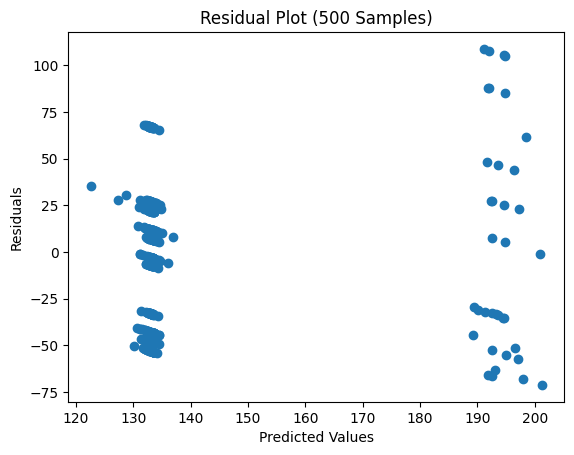

In [26]:
# residual plots for before hyperparameter tuning
res1 = y_test - predictions

# create a sample (500) residual array to plot
num_samples = min(500, len(res1))
sample_indices = np.random.choice(len(res1), size=num_samples, replace=False)
sampled_residuals = res1.iloc[sample_indices]  # Assuming 'res1' is a pandas Series

# plot the sampled residuals
plt.scatter(predictions[sample_indices], sampled_residuals)
plt.title('Residual Plot (500 Samples)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


## **Conclusions**

Regression Model of Choice: Gradient Boosting Regressor

The model produced low r-squared values before and after hyperparameter tuning. There were many limitations throughout the production of this project. The dataset most likely wasn't suitable for regression as more descriptive and related features for blood glucose level would have made the model more accurate. In addition, along with more overall data points, various other regression algorithms should be tried to try to address the non-linear relationship between the features.